## Çalışma

Daha önce X şirketine başvuran 1000 adaydan 100'ü işe alınmış olsun. Her adayın 4 özelliği olsun, ama sadece iki özelliği işe alınma için gerçekten ayırt edici olsun.

Özellikler
 - __Önemli__ : Social Skills, Knowledge in algorithms
 - __Önemsiz__ : GPA, Age
 
Bu özelliklerin tümünün 0 ile 5 arasında değer aldığını kabul ediyoruz. 
 
İşe alınanlar
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil
 
İşe alınmayanlar ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

Öncelikle bu veri setini oluşturalım

## Kutuphaneler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2019)

## Rastgele sayi uretme

Belirlenen min ve max degeri arasinda ortalaması mu olan, standart sapması 1 olan normal dagilimdan sayi uretme.

In [2]:
def generate(mu = None, minval = 0, maxval = 5):
    # Eger mu None ise, mu degeri minval ve maxval in ortalaması olsun
    if mu == None: 
        mu=(minval+maxval)/2
    
    # val ortalaması mu olan, standart sapması 1 olan normal dagilimdan rastgele sayi 
    val = np.random.normal(loc=mu,scale=1)
    
    # Eger val, maxval'den buyukse veye minval'den kucukse, sayıyı tekrar uret
    while val>maxval or val<minval :
        val = np.random.normal(loc=mu,scale=1)
    return val

## Basarili adaylar

 - Basarili adaylarin onemli ozelliklerini uretelim
 
#### İşe alınan başarılı adayların özellikleri

Yukarıdaki `generate` fonksiyonu ile verimizi olusturalım.

 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

### Basarisiz Adaylar

#### İşe alınmayan başarısız adayların özellikleri ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

# Veri Setini olusturalim

Başarılı Adaylar
> Ilk yüz kişi başarılı, 
 - target = 1
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

Başarısız Adaylar
> Geri kalan 900 kişi başarısız
 - target = 0
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

In [3]:
# 1 basarili , 0 basarisiz
target = [1 for i in range(100)] + [0 for i in range(900)]

social_skills = [np.random.uniform(3,5) for i in range(100)] + [np.random.uniform(0,2) for i in range(900)]
algorithm_knowledge = [np.random.uniform(3,5) for i in range(100)] + [np.random.uniform(0,2) for i in range(900)]
GPA = [np.random.uniform(0,5) for i in range(100)] + [np.random.uniform(0,5) for i in range(900)]
Age = [np.random.uniform(0,5) for i in range(100)] + [np.random.uniform(0,5) for i in range(900)]

Veri dictionary'si oluşturalım ardından, verimizi pandas dataframe'e dönüştürelim

In [4]:
datadict = {"social":social_skills, "algorithm":algorithm_knowledge, "gpa":GPA, "age":Age, "y":target}
data = pd.DataFrame.from_dict(datadict)

ilk 7 veri

In [5]:
data.head(7)

,social,algorithm,gpa,age,y
0,4.806964,3.349373,2.440789,0.139265,1
1,3.786161,3.808418,2.059250,0.742396,1
2,4.247940,3.995134,1.045894,2.590357,1
3,4.275755,4.937343,3.750509,4.247627,1
4,4.760998,4.828396,0.752626,4.839229,1
5,3.598344,4.305264,1.828519,1.584505,1
6,4.404397,4.297717,0.796330,3.944704,1


son 7 veri

In [6]:
data.tail(7)

,social,algorithm,gpa,age,y
993,1.867046,1.806988,3.105694,0.601139,0
994,0.971714,1.217177,0.148350,4.304380,0
995,0.856271,1.022126,1.498778,1.321347,0
996,0.497104,0.712434,2.582369,2.681622,0
997,1.799291,0.938669,3.698525,0.053657,0
998,1.618349,0.312949,0.745376,4.502958,0
999,1.953471,1.261656,1.457895,0.974766,0


Veri Özellikleri

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
social,1000.0,1.293444,1.073860,0.000060,0.560215,1.091627,1.647499,4.969447
algorithm,1000.0,1.310216,1.095133,0.003565,0.506582,1.120912,1.701857,4.966020
gpa,1000.0,2.396967,1.424219,0.002083,1.127690,2.361357,3.664647,4.991912
age,1000.0,2.413541,1.438871,0.001243,1.141817,2.409571,3.650525,4.999599
y,1000.0,0.100000,0.300150,0.000000,0.000000,0.000000,0.000000,1.000000


## Veriyi kaydet

In [8]:
data.to_csv("data.csv", index=False)

## Veriyi Oku

In [9]:
data = pd.read_csv("data.csv")

## Veriyi Ciz

Text(0.5, 1.0, 'Successful Candidates')

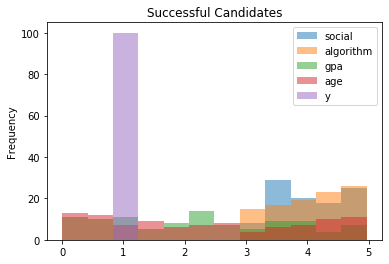

In [10]:
ax = data[data.y == 1].plot.hist(bins=12, alpha=0.5)
plt.title("Successful Candidates")

Text(0.5, 1.0, 'Unsuccessful Candidates')

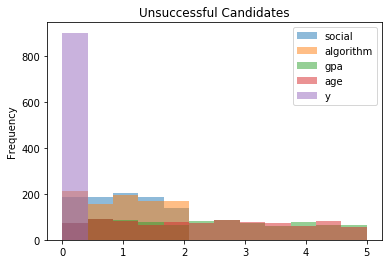

In [11]:
ax = data[data.y==0].plot.hist(bins=12, alpha=0.5)
plt.title("Unsuccessful Candidates")

## Iki boyutlu Cizim
Verinin sadece algoritma ve yas kategorisini cizdir

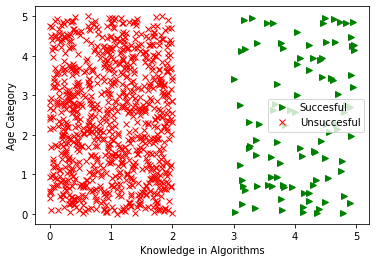

In [12]:
plt.plot(data.algorithm[:100],data.age[:100],">",c="g")
plt.plot(data.algorithm[101:],data.age[101:],"x",c="r")
plt.xlabel("Knowledge in Algorithms")
plt.ylabel("Age Category")
plt.legend(["Succesful","Unsuccesful"])

In [13]:
data.head()

,social,algorithm,gpa,age,y
0,4.806964,3.349373,2.440789,0.139265,1
1,3.786161,3.808418,2.059250,0.742396,1
2,4.247940,3.995134,1.045894,2.590357,1
3,4.275755,4.937343,3.750509,4.247627,1
4,4.760998,4.828396,0.752626,4.839229,1


## Veri Matrisini Olusuturalim

### X 
$[1000, 4]$ boyutlu
 - Verinin ilk 4 kolonu, adaylarin bilgilerini içeriyor

### y 
$[1000, 1]$ boyutlu
 - Verinin son kolonu, kabul ya da red bilgisini içeriyor


In [14]:
# numpy e donustur
M = data.values

# butun colonlar, son y kolonu haric
X = M[:,:4]
y = M[:,-1]

In [15]:
X

array([[4.80696443, 3.34937276, 2.44078869, 0.1392652 ],
       [3.78616101, 3.80841767, 2.0592501 , 0.74239557],
       [4.24793992, 3.99513445, 1.04589396, 2.5903573 ],
       ...,
       [1.79929129, 0.93866854, 3.69852492, 0.05365685],
       [1.61834881, 0.31294892, 0.74537623, 4.5029579 ],
       [1.95347082, 1.26165558, 1.45789506, 0.97476601]])

## Veriyi Normalize et

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# her feature (kolon) normalize ediliyor
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.9673033 , 0.67422432, 0.4887354 , 0.02761348],
       [0.76188493, 0.76672791, 0.41227214, 0.14827923],
       [0.85480965, 0.80435379, 0.20918779, 0.51799312],
       ...,
       [0.36206303, 0.18843569, 0.74079539, 0.01048618],
       [0.32565161, 0.06234496, 0.14896173, 0.90063903],
       [0.3930889 , 0.25352183, 0.29175597, 0.1947686 ]])

# [Oklid Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al
 - nomalize et
 - X matrisi ile Oklid mesafesini hesapla
 - en yakin k = 5 komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red
 
```
if np.mean(y[benzerler]) > 0.5:
    print("kabul")
else:
    print("red")
```

In [17]:
yeni_adaylar = np.array([[5, 5, 5, 5],
                         [5, 5, 4, 4],
                         [5, 5, 3, 3],
                         [5, 5, 2, 2],
                         [5, 5, 1, 1],
                         [5, 5, 0, 0],
                         [0, 0, 1, 1],
                         [0, 0, 2, 2],
                         [0, 0, 3, 3],
                         [0, 0, 4, 4],
                         [0, 0, 5, 5],
                         [1, 2, 3, 4],
                         [1, 1, 2, 3],
                         [1, 2, 3, 4],
                         [2, 2, 4, 4]])

In [18]:
i = 0
aday = yeni_adaylar[i].reshape(1,-1)
aday = scaler.transform(aday)
aday

array([[1.00614825, 1.00684743, 1.00162099, 1.00008015]])

In [19]:
scaler.inverse_transform(aday)

array([[5., 5., 5., 5.]])

In [20]:
def ise_alim(yeni = 0, k = 5):
    # Yeni aday matrisinden adaylari sec 
    aday = yeni_adaylar[yeni].reshape(1,-1)
    # Transfrom et
    aday = scaler.transform(aday)
    # X ile Farkini al
    D = X-aday
    # Farkin karesi
    D2 = D**2
    # Oklid mesafesini hesapla
    mesafe = np.array([np.sqrt(x[0]+x[1]+x[2]+x[3]) for x in D2])
    # Mesafeleri buyukten kucuge sirala, en kucuk k komsunun indeksi
    k_komsu = mesafe.argsort()[:k]

    if np.mean(y[k_komsu])>0.5: 
        print(scaler.inverse_transform(aday), ">> Kabul")
    else:
        print(scaler.inverse_transform(aday), ">>red")

In [21]:
for i in range(yeni_adaylar.shape[0]):
    ise_alim(yeni = i, k = 5)

[[5. 5. 5. 5.]] >> Kabul
[[5. 5. 4. 4.]] >> Kabul
[[5. 5. 3. 3.]] >> Kabul
[[5. 5. 2. 2.]] >> Kabul
[[5. 5. 1. 1.]] >> Kabul
[[5. 5. 0. 0.]] >> Kabul
[[0. 0. 1. 1.]] >>red
[[0. 0. 2. 2.]] >>red
[[0. 0. 3. 3.]] >>red
[[0. 0. 4. 4.]] >>red
[[0. 0. 5. 5.]] >>red
[[1. 2. 3. 4.]] >>red
[[1. 1. 2. 3.]] >>red
[[1. 2. 3. 4.]] >>red
[[2. 2. 4. 4.]] >>red


# [Korelasyon Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al, aday vektorunu kendi boyuna bol
 - X matrisini nomalize et, X'teki her bir satır vektörünü kendi boyuna böl 
 - X matrisi ile korelasyon temelli benzerligi hesapla
 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [22]:
yeni_adaylar

array([[5, 5, 5, 5],
       [5, 5, 4, 4],
       [5, 5, 3, 3],
       [5, 5, 2, 2],
       [5, 5, 1, 1],
       [5, 5, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 2, 2],
       [0, 0, 3, 3],
       [0, 0, 4, 4],
       [0, 0, 5, 5],
       [1, 2, 3, 4],
       [1, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 2, 4, 4]])

In [23]:
# vektorunu kendi boyuna bolen anonim fonksiyon
nomalize = lambda X: X/((X**2).sum(axis=1).reshape(X.shape[0],1))**(1/2)

In [24]:
A = nomalize(yeni_adaylar)
A

array([[0.5       , 0.5       , 0.5       , 0.5       ],
       [0.55215763, 0.55215763, 0.4417261 , 0.4417261 ],
       [0.60633906, 0.60633906, 0.36380344, 0.36380344],
       [0.65653216, 0.65653216, 0.26261287, 0.26261287],
       [0.69337525, 0.69337525, 0.13867505, 0.13867505],
       [0.70710678, 0.70710678, 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.18257419, 0.36514837, 0.54772256, 0.73029674],
       [0.25819889, 0.25819889, 0.51639778, 0.77459667],
       [0.18257419, 0.36514837, 0.54772256, 0.73029674],
       [0.31622777, 0.31622777, 0.63245553, 0.63245553]])

In [25]:
C = nomalize(X)

In [26]:
C

array([[0.75767857, 0.52811286, 0.38282133, 0.02162935],
       [0.65324   , 0.65739237, 0.35348206, 0.12713458],
       [0.65759239, 0.61877745, 0.16092506, 0.39848443],
       ...,
       [0.42803945, 0.22277311, 0.87578575, 0.01239701],
       [0.33530019, 0.06419215, 0.15337525, 0.92732367],
       [0.67231671, 0.4336092 , 0.49900268, 0.33312104]])

In [27]:
# C matrisi ile A matrisinin vektör çarpımını al
B = C.dot(A.T)
B

array([[0.84512105, 0.88861597, 0.92676612, ..., 0.54643203, 0.55664782,
        0.66240002],
       [0.89562451, 0.93597658, 0.96953759, ..., 0.6194192 , 0.64576658,
        0.718427  ],
       [0.91788967, 0.95186312, 0.97742799, ..., 0.72132333, 0.72515914,
        0.75742521],
       ...,
       [0.76949766, 0.75168463, 0.71773702, ..., 0.62989558, 0.6482353 ,
        0.76754111],
       [0.74009563, 0.69795567, 0.63538979, ..., 0.90065294, 0.84588536,
        0.80982458],
       [0.96902482, 0.9782162 , 0.97329555, ..., 0.80126717, 0.7976716 ,
        0.87600573]])

 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [ ]:
alim = lambda a : "Kabul" if a else "Red"

[(yeni_adaylar[i, :], alim((...) > 0.5)) for i in range(A.shape[0])]